Floresta aleatória
==================



## O algoritmo da floresta aleatória



Nós vimos no notebook anterior o algoritmo de árvore de decisão. Ele gera modeloz relativamente simples e explicáveis, porém a performance destes modelos muitas vezes deixa a desejar.

Mas e se montarmos um comitê (*ensemble*) contendo diversas árvores de decisão onde cada uma realiza sua previsão individual; podemos considerar que cada uma dessas previsões são &ldquo;votos&rdquo; e considerando todos os votos nós podemos chegar em uma resposta final. Será que juntar modelos com relativa baixa performance em um comitê pode nos ajudar a melhorar a nossa previsão?

A resposta é *sim*! 🎉

O nome do algoritmo descrito acima é &ldquo;floresta aleatória&rdquo;. É uma &ldquo;floresta&rdquo; pois é feita de diversas *árvores* de decisão. É &ldquo;aleatória&rdquo; pois o processo de construir cada uma das árvores de decisão desta floresta envolve amostragem dos exemplos e das features.

Para uma fundamentação teórica mais aprofundada, assista ao vídeo sobre o tema do [StatQuest](https://youtu.be/J4Wdy0Wc_xQ).

Para usar o `scikit-learn` para treinar um modelo de floresta aleatória, nós vamos seguir o mesmo procedimento que usamos nos notebooks anteriores.

Vamos primeiro carregar os dados.



In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455
DATASET_NAME = "diamonds"
FEATURES = ["carat", "depth", "table", "x", "y", "z"]
TARGET = ["price"]

df = sns.load_dataset(DATASET_NAME)

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

Agora vamos treinar o modelo! Note que passamos o valor da semente aleatória para o argumento `random_state` na hora que criamos o modelo, assim como fizemos com a árvore de decisão no notebook anterior. A explicação é a mesma, retorne ao notebook de árvore de decisão caso não se recorde. Outro detalhe é que o `scikit-learn` dá um aviso quando tentamos treinar este modelo caso os nossos targets (`y_treino` e `y_teste`) sejam arrays com mais de uma dimensão (isto é, caso seu atributo `shape` tenha 2 ou mais elementos). Para evitar esse problema, os arrays em questão foram transformados para arrays unidimensionais com o método `ravel`.



In [2]:
from sklearn.ensemble import RandomForestRegressor

# alterando o formato do target
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

# cria o modelo
modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_rf.predict(X_teste)
print()
print(previsao)

(48546, 1) (5394, 1)
(48546,) (5394,)

[1077.97        777.26        785.86809524 ...  493.72        735.89
  923.07      ]


Vamos checar a performance do nosso modelo de floresta aleatória.



In [3]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE} dólares.")

O RMSE do modelo árvore de decisão foi de 1384.6366214316938 dólares.


O RMSE do modelo de floresta aleatória foi de 1385 dólares! Até agora este é o melhor RMSE de um modelo padrão sem alterar os hiperparâmetros.



## Hiperparâmetros



O algoritmo da floresta aleatória tem os mesmos hiperparâmetros do algoritmo da árvore de decisão e mais alguns outros. Todos eles podem ser conferidos na [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). Um novo hiperparâmetro muito importente é o `num_estimators` que controla o número de árvores que irão compor o comitê (por padrão esse valor é de 100).

Fique atento que o argumento `n_jobs` deste algoritmo *não é um hiperparâmetro*, mas sim o controle de como os cálculos serão executados. Por padrão, o `scikit-learn` usa apenas um núcleo de CPU para induzir sua floresta aleatória. Isso pode ser muito lento! Considere aumentar esse valor se você tiver capacidade computacional para tal.

O código abaixo testa três hiperparâmetros.



In [4]:
from itertools import product

NUM_ARVORES = [10, 100, 300]
NUM_FOLHAS = [None, 6]
NUM_PROFUNDIDADE = [None, 3]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f} dólares."
    )

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi de 1440.74 dólares.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=None foi de 1384.64 dólares.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=None foi de 1377.99 dólares.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=3 foi de 1418.18 dólares.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=3 foi de 1417.28 dólares.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=3 foi de 1418.01 dólares.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=None foi de 1463.91 dólares.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=None foi de 1461.31 dólares.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=6 e max_depth=None foi de 1462.44 dólares.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=3 fo

Notou algum padrão?



## Medindo a importância das features usando o conceito de impureza



Nem todas as features têm a mesma &ldquo;importância&rdquo; quando um modelo realiza uma previsão. Em outras palavras, nem todas as features contribuem de maneira igual quando o modelo usa elas para prever o target.

A importância de uma certa feature em um modelo treinado pelo algoritmo de floresta aleatória pode ser estimada observando o quanto esta feature contribuiu para reduzir a impureza de cada árvore contida no comitê (*ensemble*).

<u>Impureza</u> é um conceito importante em árvores de decisão pois é usado em diversos algoritmos que nos permitem induzir árvores de decisão sem a necessidade de testar todas as possibilidades possíveis (lembre-se que induzir *a melhor* árvore de decisão é um problema NP-difícil, logo não sabemos se existe ou não um algoritmo eficiente para resolver este problema).

Uma forma intuitiva de se entender impureza no contexto de regressão é pensar que cada target do seu dataset representa uma cor. Quanto mais próximos os valores, mais próximas as cores. Se todos os exemplos do seu dataset tem a cor roxa, então seu dataset tem pouca impureza. Se seus exemplos tem todas as cores do espectro visível, então seu dataset tem alta impureza. Em uma árvore de decisão, a função de cada vértice que contém um condicional é separar os dados de forma que cada vértice subsequente tenha uma impureza menor. É como se os vértices fossem sucessivamente separando as cores em verdes, vermelhos, azuis, etc, durante o caminhar pelo grafo da árvore de decisão. Cada separação é feita por um condicional e cada condicional testa uma feature. Logo, é esperado que algumas features irão reduzir mais a impureza do que outras. Dizemos que as features que reduzem mais a impureza são as que têm maior <u>importância</u>. Como uma floresta aleatória é formada de diversas árvores de decisão, podemos avaliar com boa estatística quais são as features que contribuem mais para reduzir a impureza.

Vamos ver como podemos usar o `scikit-learn` para fazer essa análise. Primeiramente temos que treinar o modelo. Aqui vamos usar um modelo mais simples com apenas 50 árvores para o processo ficar mais rápido.



In [5]:
N_ARVORES = 50
N_JOBS = 4

modelo_rf = RandomForestRegressor(
    n_estimators=N_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=N_JOBS,
)

modelo_rf.fit(X_treino, y_treino)

RandomForestRegressor(n_estimators=50, n_jobs=4, random_state=61455)

O `scikit-learn` já computa as importâncias de florestas aleatórias automaticamente e armazena elas no atributo `feature_importances_`. Dica: atributos que terminam com um sublinhado (`_`) dizem respeito a características do modelo que foram obtidas *após* o treinamento. Atributos que não terminam com sublinhado são características que foram determinadas *antes* do treinamento.

O código abaixo avalia a importância e seu desvio padrão.



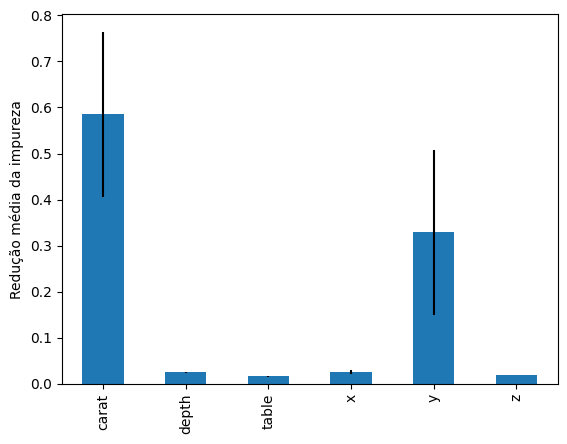

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)

serie_importancia = pd.Series(importancia, index=FEATURES)

fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Redução média da impureza")
plt.show()

Vemos que o peso quilate (`carat`) e a altura (`y`) do diamante são as características consideradas mais importantes nesta análise. O peso quilate promoveu uma redução média da impureza de aproximadamente 0,6 com um desvio padrão de aproximadamente 0,2. Fora essas duas, as demais features não apresentaram uma importância relevante nesta análise.

Note que este parâmetro que chamamos de importância foi obtido utilizando características do modelo que ele adquiriu durante seu treino. Logo, este valor de importância apenas nos diz quais são as features mais importantes observadas nos dados de treino. Esta importância não nos diz quais são as features mais importantes no contexto de generalização do modelo (isto é, quais as features mais importantes no ato de prever um dado novo ainda não visto)!

Por fim, valores de importância estimados pela impureza favorecem features de alta cardinalidade (tipicamente features numéricas ou contínuas) em detrimento de features de baixa cardinalidade (features categóricas ou features binárias).



## Medindo a importância das features usando a técnica de permutação de atributos



Existem outras formas de se medir o quanto uma feature é importante para um modelo. Uma delas é a técnica de <u>permutação de atributos</u>. Esta técnica se baseia em comparar como uma certa métrica de avaliação varia se nós embaralharmos os valores de um certo atributo.

Vamos imaginar que o valor do peso quilate é muito importante para definir o preço do diamante. Se este valor é de fato muito importante, então ao embaralharmos os valores desta coluna (isto é, alterar os valores de posição de forma aleatória) isso vai impactar *muito* a previsão do modelo, fazendo com que ele apresente uma baixa performance nas métricas de avaliação.

Nesta mesma linha, se embaralharmos os valores de uma feature que não é importante para a previsão do nosso target, então isso pouco irá influenciar a performance do modelo e pouco irá afetar as métricas de avaliação.

Embaralhando todas as features um certo número de vezes, nós podemos quantificar o impacto das features nas métricas e com isso temos uma medida da importância das features: quanto maior o impacto mais importante a feature é!

Aqui vamos trocar a métrica para o coeficiente de determinação ($R^2$) ao invés do RMSE. O coeficiente de determinação tem diversas formas de se calcular. O calculo que o `scikit-learn` faz considera que um valor de $R^2$ igual a zero significa que o seu modelo é tão bom quanto o modelo baseline que chuta sempre a média. Para o `scikit-learn` é possível ter um valor de $R^2$ negativo, basta seu modelo ser pior que o modelo baseline.

Sem entrar no formalismo estatístico, temos que a forma de calcular o $R^2$ do `scikit-learn` é válida quando seu modelo linear possuí coeficiente linear (ou seja, tem a forma $y = ax + b$). Neste caso, a equação para o cálculo é $R^2 = 1 - (\sum_i (y_i - \hat{y}_i )^2)/(\sum_i (y_i - \bar{y})^2)$, onde $\hat{y}_i$ é o valor de $y_i$ predito pelo modelo e $\bar{y} = (1/n) \sum_{i=1}^{n} y_i$ é a média dos valores de $y$.

Quando nós usamos métricas para quantificar a performance de modelos de aprendizado de máquina, nós buscamos entender como o target previsto se distancia do target verdadeiro. Veja que neste caso não faz sentido termos um coeficiente linear! A relação esperada entre target previsto e target verdadeiro é uma reta que deve passar pela origem. Neste caso, temos que a fórmula para computar o $R^2$ é diferente: $R^2 = 1 - (\sum_i (y_i - \hat{y}_i )^2)/(\sum_i y_i^2)$.

Colocamos tudo que vimos acima no código abaixo.



In [7]:
from sklearn.inspection import permutation_importance

N_REPETICOES = 10


def R2_1param(modelo, x, y):
    """Computa o coef. de determinação quando hip. alt. não tem coef. linear."""
    y_pred = modelo.predict(x).ravel()
    y_true = (np.array(y)).ravel()
    return 1 - sum((y_true - y_pred) ** 2) / sum(y_true**2)


X_local = X_treino
y_local = y_treino

R2 = R2_1param(modelo_rf, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_rf,
    X_local,
    y_local,
    n_repeats=N_REPETICOES,
    random_state=SEMENTE_ALEATORIA,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{FEATURES[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

O R^2 da previsão é de 0.9907766431356714

carat   0.555 +/- 0.003
y       0.182 +/- 0.001
x       0.051 +/- 0.000
z       0.036 +/- 0.000
table   0.032 +/- 0.000
depth   0.031 +/- 0.000


Vemos da análise acima que o peso quilate por essa análise contribui com grande parte do valor do $R^2$, seguido da feature que representa a altura do diamante.

Note que na análise acima nós usamos os dados de treino para computar a importância das features. Fizemos isso para poder comparar com as importância usando a metodologia da impureza que vimos na seção anterior. Podemos rodar o código acima usando os dados de teste. Neste caso, estamos avaliando qual das features é a mais importante para a *generalização* do modelo.



In [8]:
X_local = X_teste
y_local = y_teste

R2 = R2_1param(modelo_rf, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_rf,
    X_local,
    y_local,
    n_repeats=N_REPETICOES,
    random_state=SEMENTE_ALEATORIA,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{FEATURES[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

O R^2 da previsão é de 0.9387281285351374

carat   0.515 +/- 0.007
y       0.135 +/- 0.004
x       0.019 +/- 0.001
table   0.005 +/- 0.001
z       0.005 +/- 0.000
depth   0.005 +/- 0.001


Não observamos uma diferença significativa entre o resultado utilizando os dados de teste em comparação com os de treino.

Features que tem grande importância nos dados de treino mas não tem grande importância nos dados de teste podem ser features que levam ao sobreajuste.

Por fim, é importante ressaltar que se seu modelo <u>é ruim</u> então sua análise de importância não será representativa do que realmente importa. A análise de importância é indissociável do modelo usado para inferência.



## Referências e leitura adicional



1.  [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
2.  [https://youtu.be/J4Wdy0Wc_xQ](https://youtu.be/J4Wdy0Wc_xQ)
3.  [https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)
4.  [https://scikit-learn.org/stable/modules/permutation_importance.html](https://scikit-learn.org/stable/modules/permutation_importance.html)
5.  [https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance)
6.  [https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py)
7.  [https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py)
8.  [https://stats.stackexchange.com/a/360750](https://stats.stackexchange.com/a/360750)
9.  [https://stats.stackexchange.com/a/37442](https://stats.stackexchange.com/a/37442)

